In [1]:
#load libraries and setup file
import sys,os
root_path = os.path.abspath(os.path.join('..'))
print(root_path)
if root_path not in sys.path:
    sys.path.append(root_path)
%run -i "../lib/utils/ipynb_setup.py"
%load_ext autoreload
%autoreload 2
%matplotlib inline

#plotting
import matplotlib.pyplot as pl
import seaborn as sns
sns.set_style("ticks", {'axes.grid' : True})
# pl.rc("figure", facecolor="white",figsize = (8,8))
pl.rc("figure", facecolor="gray",figsize = (8,8))
pl.rc('text', usetex=False)
pl.rc('text.latex', preamble=r'\usepackage{amsmath}')
pl.rc('lines',markeredgewidth = 2)
pl.rc('font',size = 10)

/home/mptouzel/Dropbox/scripts/Projects/topicmod/code


In [2]:
year=2019

df = pd.read_stata('../../data/carbon_tax/CCOP_wave1.dta')

# format covariate metadata
included_fields = {'responseid': 'id', 'lang': 'lang', 'd1': 'sex', 'd3': 'ageyear', 'prov': 'prov', 'd10': 'livingenv', 'd11': 'partisanship', 'd13': 'caruse', 'v3': 'partyvote'}
covdf = df.loc[:, included_fields.keys()].rename(columns=included_fields)

In [278]:
restype='all'
# restype='support'
# restype='oppose'
K=11
K=7
filename=restype+"_reponses_all_model_sigma1_K_"+str(K)+"_seed_1_topicwordlists.csv"

Get Corpus

In [3]:
question_label = 'carbontax_q3'

year='2019'
fig_dir='../../output/figures/'+year+'/'
data_dir='../../output/data/'+year+'/'
models_dir='../../output/stm_models/'+year+'/'
# from lib.lib import *
restypelist=['support','oppose','notsure']
max_char_length=512
# fdf=process_data(data_dir,year)
# or load from file:
fdf=pd.read_csv(data_dir+question_label+'_2019data.csv',sep='\t')

## Premodel analysis

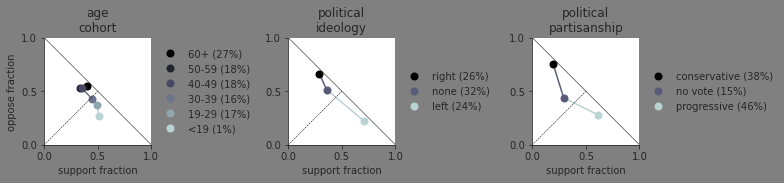

In [5]:
num_plots=3
fig,axa=pl.subplots(1,num_plots,figsize=(11 if num_plots==3 else 5*4/3,4))

for it in range(num_plots):

    if it==0:
        field_name = 'agedec'
        value_list=[ '<19','19-29', '30-39', '40-49', '50-59','60+'] #order by age
    elif it==1:
        field_name = 'partisanship'
        value_list=[ 'left','none', 'right'] #order by age
    elif it==2:
        field_name = 'partyvote'
        value_list=[ 'progressive','no vote', 'conservative'] #order by age
    else:
        field_name = 'warmingcause'
        value_list=['human','natural','notsure'] #order by age

    pycolors=pl.cm.bone(np.linspace(0, 0.8, len(value_list))) #['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    for vit,val in enumerate(value_list[::-1]):
        datatmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts()
        if len(datatmp)<3:
            datatmp=datatmp[restypelist[:2]]
        else:
            datatmp=datatmp[restypelist]
        datatmp=datatmp/datatmp.sum()  
        if vit>0:
            axa[it].plot([datatmp[0],datlast[0]],[datatmp[1],datlast[1]],'-',color=pycolors[vit])
        datlast=datatmp
    for vit,val in enumerate(value_list[::-1]):
        datatmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts()
        if len(datatmp)<3:
            datatmp=datatmp[restypelist[:2]]
        else:
            datatmp=datatmp[restypelist]
        datatmp=datatmp/datatmp.sum() 
        axa[it].plot([datatmp[0]],[datatmp[1]],'o',color=pycolors[vit],label=val+' ('+str(int(100*len(fdf.loc[fdf[field_name]==val])/len(fdf)))+'%)')
        datlast=datatmp

    axa[it].set_title(field_name)
    axa[it].plot([0,1],[1,0],'k-',lw=0.5)
    axa[it].plot([0,0.5],[0,0.5],'k--',lw=0.5)
    axa[it].set_xlabel('support fraction')
    axa[it].set_xlim(0,1)
    axa[it].set_ylim(0,1)
    axa[it].set_aspect('equal')
    axa[it].set_xticks([0,1/2,1])
    axa[it].set_yticks([0,1/2,1])
    axa[it].legend(frameon=False,bbox_to_anchor=(1,0.5),loc='center left',prop={"size":10})
#         axa[it].set_xticks([1/4,1/2,3/4])
#         axa[it].set_yticks([1/4,1/2,3/4])
#         axa[it].set_xticklabels(['1/4','1/2','3/4'])
#         axa[it].set_yticklabels(['1/4','1/2','3/4'])
    if it==0:
        axa[it].set_ylabel('oppose fraction')
#         if it>0:
#             axa[it].set_yticklabels([])
    axa[it].spines[['right','top']].set_visible(False)
    axa[it].grid(False)

axa[0].set_title('age\ncohort')
axa[1].set_title('political\nideology')
axa[2].set_title('political\npartisanship')
pl.subplots_adjust(wspace=0)
fig.tight_layout()
fig.savefig(fig_dir+"figure2.png", transparent=True,bbox_inches="tight",dpi=300)


/tmp/ipykernel_4462/2629951501.py:89: UserWarning: FixedFormatter should only be used together with FixedLocator
  axw[1,0].set_yticklabels(['0','','0.05','','0.1'])


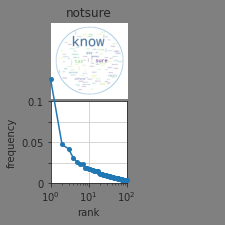

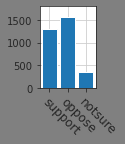

In [110]:
if True:
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_extraction.text import CountVectorizer
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    from wordcloud import WordCloud
    from matplotlib.ticker import NullFormatter
    x,y =np.ogrid[:300,:300]
    mask = (x -150)**2+(y-150)**2>130**2
    mask=255*mask.astype(int)
    pycolors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    vectorizer = TfidfVectorizer(stop_words='english')    
    vecs = vectorizer.fit_transform(list(fdf.resclean.values))
    feature_names = vectorizer.get_feature_names_out()
    dense = vecs.todense()
    lst1 = dense.tolist()
    df = pd.DataFrame(lst1, columns=feature_names)
    
    for fit,field_name in enumerate(['restype']):#,'prov','partisanship','partyvote','caruse','sex','livingenv','agedec']):#,'warmingcause']):
        value_list=list(fdf[field_name].unique())
        if field_name == 'restype':
            value_list=restypelist
        if field_name == 'prov':
            value_list=['BC','AB','SK','ON','QC'] #order geographically
        if field_name == 'agedec':
            value_list=[ '<19','19-29', '30-39', '40-49', '50-59','60+'] #order by age
                        
#         figw,axw=pl.subplots(2,len(value_list),figsize=(1.5*(len(value_list)),3),gridspec_kw={'wspace':0.2,'hspace':0})
#         for vit,val in enumerate(value_list):
#         figw,axw=pl.subplots(2,len(value_list)-1,figsize=(1.5*(len(value_list)-1),3),gridspec_kw={'wspace':0.2,'hspace':0})
#         for vit,val in enumerate(value_list[:-1]):
        figw,axw=pl.subplots(2,len(value_list)-1,figsize=(1.5*(len(value_list)-1),3),gridspec_kw={'wspace':0.2,'hspace':0})
        for vit,val in enumerate([value_list[-1]]):
            if list(fdf.loc[fdf[field_name]==val,'resclean']):
                vectorizer = CountVectorizer(stop_words='english') 
                vecs = vectorizer.fit_transform(list(fdf.loc[fdf[field_name]==val,'resclean'].values))
                word_docfreqs = np.mean(vecs.toarray(),axis=0)
                
                vectorizer = TfidfVectorizer(stop_words='english')    
                vecs = vectorizer.fit_transform(list(fdf.loc[fdf[field_name]==val,'resclean'].values))
                feature_names = vectorizer.get_feature_names_out()
                dense = vecs.todense()
                lst1 = dense.tolist()
                df = pd.DataFrame(lst1, columns=feature_names)
                
                wc=WordCloud(background_color='white', mask=mask, max_words=100,contour_color=pycolors[vit],contour_width=0.1,relative_scaling=1)
                wc.generate_from_frequencies(df.T.sum(axis=1))
                
#                 wc.generate_from_frequencies(df.loc[fdf[field_name]==val,:].T.sum(axis=1))
#                 wc.generate(' '.join(fdf.loc[fdf[field_name]==val,'resclean']))
                
                axw[0,vit].imshow(wc,interpolation='bilinear')
                axw[0,vit].set_title(val)
                axw[0,vit].axis('off')
                normed_data=np.array(list(wc.words_.values()))/np.sum(np.array(list(wc.words_.values())))
#                 normed_data=np.sort(word_docfreqs)

                axw[1,vit].plot(np.arange(1,len(normed_data)+1),normed_data,'.-',color=pycolors[vit],clip_on=False,zorder=4)
                axw[1,vit].set_aspect('auto')
                axw[1,vit].set_xscale('log')
                axw[1,vit].set_xlim(1,100)
                axw[1,vit].set_ylim(0,0.1)
                if vit>0:
                    axw[1,vit].set_yticklabels([])
#                 axw[1,vit].xaxis.set_major_formatter(NullFormatter())

                if field_name=='restype' and vit==0:
                    restypelist_tmp=restypelist
                    if len(fdf.restype.value_counts().index)<len(restypelist):
                        restypelist_tmp=fdf.restype.value_counts().index.values
                    figres,axres=pl.subplots(figsize=(1,1.5))
                    axres.bar(np.arange(len(restypelist_tmp)),fdf.restype.value_counts()[restypelist_tmp],tick_label=restypelist_tmp)
                    axres.set_ylim(0,1800)
                    axres.set_xticks(np.arange(3),restypelist,rotation=-45,fontsize=12,ha='left',rotation_mode='anchor')
                    figres.savefig(fig_dir+"premodel_"+field_name+"_responses.png", transparent=True,bbox_inches="tight",dpi=300)
                elif field_name!='restype':
                    restypelist_tmp=restypelist
                    if len(fdf.loc[fdf[field_name]==val,'restype'].value_counts().index)<len(restypelist):
                        restypelist_tmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts().index.values
                    ax = inset_axes(axw[1,vit],width='40%',height='40%',loc=1)
                    datatmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts()[restypelist_tmp]
                    ax.bar(np.arange(len(restypelist_tmp)),datatmp,color=pycolors[vit])
                    ax.set_xticks(np.arange(len(restypelist_tmp)),restypelist_tmp,rotation=-45,fontsize=7,ha='left',rotation_mode='anchor')
                    axw[1,vit].text(1,1,'n='+str(datatmp.sum()),ha='right',va='bottom',transform=axw[1,vit].transAxes)

#                 if field_name == 'agedec':
#                     axa.plot(datatmp[0],datatmp[0],'o',color=pycolors[vit])

        axw[1,0].set_yticklabels(['0','','0.05','','0.1'])
        axw[1,0].set_ylabel('frequency')
        axw[1,0].set_xlabel('rank')
        axw[1,1].set_xlabel('rank')
        axw[1,1].axis('off')
        axw[0,1].axis('off')
        figw.savefig(fig_dir+"premodel_"+field_name+"_wordclouds.png", transparent=True,bbox_inches="tight",dpi=300)
    
#         figl,axl=pl.subplots(2,len(value_list),figsize=(1.5*len(value_list),1.5),gridspec_kw={'wspace':0,'hspace':0})
#         for vit,val in enumerate(value_list):
#             counts,binvec=np.histogram(fdf.loc[fdf[field_name]==val,'res'].apply(len).values,bins=binvec)
#             axl[0,vit].plot(binsvec,counts/np.sum(counts),'.-',color=pycolors[vit],clip_on=False,zorder=4)
#             axl[0,vit].set_aspect('auto')
# #             axl[0,vit].set_xscale('log')
#             axl[0,vit].set_xlim(1,200)
#             axl[0,vit].set_ylim(0,0.5)
#             axl[0,vit].set_yticklabels([])
#             axl[0,vit].xaxis.set_major_formatter(NullFormatter())
        

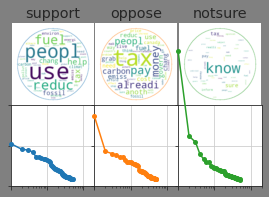

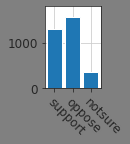

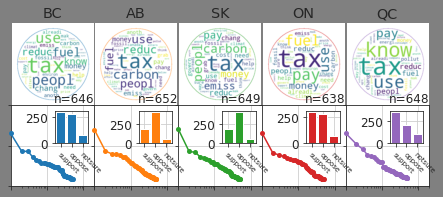

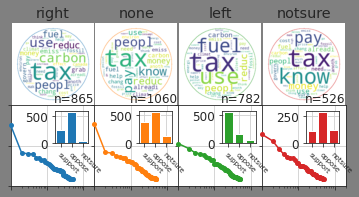

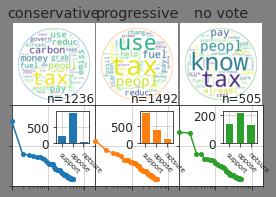

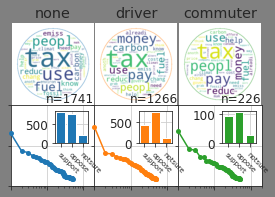

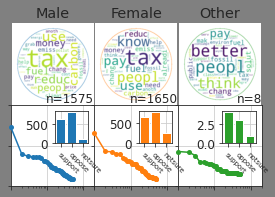

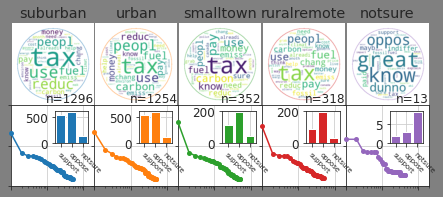

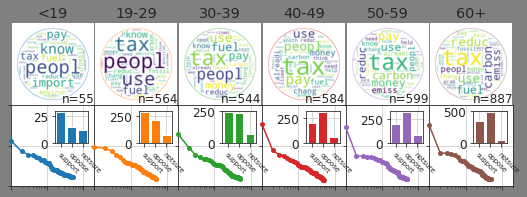

In [930]:
if True:
    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.feature_extraction.text import CountVectorizer
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    from wordcloud import WordCloud
    from matplotlib.ticker import NullFormatter
    x,y =np.ogrid[:300,:300]
    mask = (x -150)**2+(y-150)**2>130**2
    mask=255*mask.astype(int)
    pycolors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    
    vectorizer = TfidfVectorizer(stop_words='english')    
    vecs = vectorizer.fit_transform(list(fdf.resclean.values))
    feature_names = vectorizer.get_feature_names_out()
    dense = vecs.todense()
    lst1 = dense.tolist()
    df = pd.DataFrame(lst1, columns=feature_names)
    
    for fit,field_name in enumerate(['restype','prov','partisanship','partyvote','caruse','sex','livingenv','agedec']):#,'warmingcause']):
        value_list=list(fdf[field_name].unique())
        if field_name == 'restype':
            value_list=restypelist
        if field_name == 'prov':
            value_list=['BC','AB','SK','ON','QC'] #order geographically
        if field_name == 'agedec':
            value_list=[ '<19','19-29', '30-39', '40-49', '50-59','60+'] #order by age
                        
        figw,axw=pl.subplots(2,len(value_list),figsize=(1.5*len(value_list),3),gridspec_kw={'wspace':0,'hspace':0})
        for vit,val in enumerate(value_list):
            if list(fdf.loc[fdf[field_name]==val,'resclean']):
                vectorizer = CountVectorizer(stop_words='english') 
                vecs = vectorizer.fit_transform(list(fdf.loc[fdf[field_name]==val,'resclean'].values))
                word_docfreqs = np.mean(vecs.toarray(),axis=0)
                
                vectorizer = TfidfVectorizer(stop_words='english')    
                vecs = vectorizer.fit_transform(list(fdf.loc[fdf[field_name]==val,'resclean'].values))
                feature_names = vectorizer.get_feature_names_out()
                dense = vecs.todense()
                lst1 = dense.tolist()
                df = pd.DataFrame(lst1, columns=feature_names)
                
                wc=WordCloud(background_color='white', mask=mask, max_words=50,contour_color=pycolors[vit],contour_width=0.1,relative_scaling=1)
                wc.generate_from_frequencies(df.T.sum(axis=1))
                
#                 wc.generate_from_frequencies(df.loc[fdf[field_name]==val,:].T.sum(axis=1))
#                 wc.generate(' '.join(fdf.loc[fdf[field_name]==val,'resclean']))
                
                axw[0,vit].imshow(wc,interpolation='bilinear')
                axw[0,vit].set_title(val)
                axw[0,vit].axis('off')
#                 normed_data=np.array(list(wc.words_.values()))/np.sum(np.array(list(wc.words_.values())))
                normed_data=np.sort(word_docfreqs)

                axw[1,vit].plot(np.arange(1,len(normed_data)+1),normed_data,'.-',color=pycolors[vit],clip_on=False,zorder=4)
                axw[1,vit].set_aspect('auto')
                axw[1,vit].set_xscale('log')
                axw[1,vit].set_xlim(1,200)
                axw[1,vit].set_ylim(0,0.1)
                axw[1,vit].set_yticklabels([])
                axw[1,vit].xaxis.set_major_formatter(NullFormatter())

                if field_name=='restype' and vit==0:
                    restypelist_tmp=restypelist
                    if len(fdf.restype.value_counts().index)<len(restypelist):
                        restypelist_tmp=fdf.restype.value_counts().index.values
                    figres,axres=pl.subplots(figsize=(1,1.5))
                    axres.bar(np.arange(len(restypelist_tmp)),fdf.restype.value_counts()[restypelist_tmp],tick_label=restypelist_tmp)
                    axres.set_ylim(0,1800)
                    axres.set_xticks(np.arange(3),restypelist,rotation=-45,fontsize=12,ha='left',rotation_mode='anchor')
                    figres.savefig(fig_dir+"premodel_"+field_name+"_responses.png", transparent=True,bbox_inches="tight",dpi=300)
                elif field_name!='restype':
                    restypelist_tmp=restypelist
                    if len(fdf.loc[fdf[field_name]==val,'restype'].value_counts().index)<len(restypelist):
                        restypelist_tmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts().index.values
                    ax = inset_axes(axw[1,vit],width='40%',height='40%',loc=1)
                    datatmp=fdf.loc[fdf[field_name]==val,'restype'].value_counts()[restypelist_tmp]
                    ax.bar(np.arange(len(restypelist_tmp)),datatmp,color=pycolors[vit])
                    ax.set_xticks(np.arange(len(restypelist_tmp)),restypelist_tmp,rotation=-45,fontsize=7,ha='left',rotation_mode='anchor')
                    axw[1,vit].text(1,1,'n='+str(datatmp.sum()),ha='right',va='bottom',transform=axw[1,vit].transAxes)

#                 if field_name == 'agedec':
#                     axa.plot(datatmp[0],datatmp[0],'o',color=pycolors[vit])

#                 ax.set_ylim(0,1000)
#                 ax.set_yticks([1000])
        figw.savefig(fig_dir+"premodel_"+field_name+"_wordclouds.png", transparent=True,bbox_inches="tight",dpi=300)
    
#         figl,axl=pl.subplots(2,len(value_list),figsize=(1.5*len(value_list),1.5),gridspec_kw={'wspace':0,'hspace':0})
#         for vit,val in enumerate(value_list):
#             counts,binvec=np.histogram(fdf.loc[fdf[field_name]==val,'res'].apply(len).values,bins=binvec)
#             axl[0,vit].plot(binsvec,counts/np.sum(counts),'.-',color=pycolors[vit],clip_on=False,zorder=4)
#             axl[0,vit].set_aspect('auto')
# #             axl[0,vit].set_xscale('log')
#             axl[0,vit].set_xlim(1,200)
#             axl[0,vit].set_ylim(0,0.5)
#             axl[0,vit].set_yticklabels([])
#             axl[0,vit].xaxis.set_major_formatter(NullFormatter())
        

# Word frequency classification

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import NullFormatter

pycolors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

vectorizer = CountVectorizer(stop_words='english')    
vecs = vectorizer.fit_transform(list(fdf.resclean.values))
feature_names = vectorizer.get_feature_names_out()
dense = vecs.todense()
lst1 = dense.tolist()
df = pd.DataFrame(lst1, columns=feature_names)
df.head()

,abandon,abil,abl,abrupt,absolut,absorb,absurdli,abund,abus,ac,...,wtf,wynn,yard,ye,year,yearli,yield,young,younger,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn import preprocessing

In [75]:
cond_support=(fdf.restype=='support').values
sample_size=100
datatmp=df.to_numpy()
scaler = preprocessing.MaxAbsScaler().fit(datatmp)
datatmp = scaler.transform(datatmp)
scores=[]
maxitervec=[500]
for max_iter in maxitervec:
    tmp=[]
    for sample in range(sample_size):
        X_train, X_test, y_train, y_test=train_test_split(datatmp,cond_support,test_size=0.33)
        clf=Perceptron(random_state=0,penalty='none',max_iter=max_iter).fit(X_train,y_train)
        tmp.append(clf.score(X_test,y_test))
    scores.append(np.mean(tmp))

In [78]:
sorted_inds=np.argsort(clf.coef_[0]*np.mean(df.to_numpy(),axis=0))
print(df.columns.values[sorted_inds[:50]])
print(df.columns.values[sorted_inds[-50:][::-1]])

['tax' 'alreadi' 'grab' 'live' 'chang' 'need' 'afford' 'pay' 'cost' 'way'
 'anoth' 'know' 'ga' 'canada' 'canadian' 'produc' 'countri' 'car' 'caus'
 'anyth' 'warm' 'money' 'say' 'stop' 'consum' 'incom' 'contribut' 'china'
 'resourc' 'alberta' 'big' 'inform' 'collect' 'govern' 'extra' 'realli'
 'believ' 'vehicl' 'gener' 'solut' 'charg' 'life' 'sens' 'averag' 'electr'
 'fix' 'rais' 'work' 'taxpay' 'lot']
['use' 'peopl' 'climat' 'pollut' 'environ' 'help' 'energi' 'reduc'
 'encourag' 'support' 'fuel' 'thing' 'altern' 'planet' 'product' 'protect'
 'hope' 'larg' 'good' 'someth' 'futur' 'mak' 'agre' 'look' 'world'
 'fossil' 'everyon' 'develop' 'long' 'corpor' 'small' 'think' 'earth'
 'low' 'carbon' 'fight' 'year' 'revenu' 'goe' 'start' 'global' 'forc'
 'lead' 'creat' 'environment' 'transit' 'respons' 'price' 'import' 'slow']


In [85]:
sample_size=50
splitvec=[0.33]#0.01,0.05,0.1,0.2,0.4]
topkvec=range(1,1002,50)
topkstore=np.zeros((sample_size,21,len(splitvec)))

for tit,topk in enumerate(topkvec):
    topklist=list(sorted_inds[:topk])+list(sorted_inds[-topk:])
    datatmp=data[:,topklist]
    scaler = preprocessing.MaxAbsScaler().fit(datatmp)
    datatmp = scaler.transform(datatmp)
    for sit,test_size in enumerate(splitvec):
        scores=[]
        for sample in range(sample_size):
            X_train, X_test, y_train, y_test=train_test_split(datatmp,cond_support,test_size=test_size,random_state=1+sample)
            clf=LogisticRegression(random_state=0,penalty='none',max_iter=2000).fit(X_train,y_train)
            scores.append(clf.score(X_test,y_test))
        topkstore[:,tit,sit]=scores

/home/mptouzel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mptouzel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

/home/mptouzel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mptouzel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

/home/mptouzel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mptouzel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

/home/mptouzel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mptouzel/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

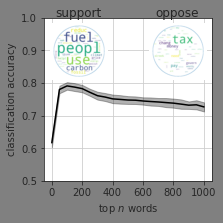

In [97]:
for sit,test_size in enumerate(splitvec):
    fig,ax=pl.subplots(figsize=(3,3))
#     dftmpp=pd.DataFrame(topkstore[:,:,sit]),columns=('sample','word')
    
    ax.fill_between(range(1,1002,50),np.mean(topkstore[:,:,sit],axis=0)-np.std(topkstore[:,:,sit],axis=0),
                    np.mean(topkstore[:,:,sit],axis=0)+np.std(topkstore[:,:,sit],axis=0),color='black',alpha=0.3,interpolate=True)
    ax.plot(range(1,1002,50),np.mean(topkstore[:,:,sit],axis=0),'k-')
    ax.set_ylim(0.5,1)
    ax.set_xticks(np.arange(0,1001,200))
    ax.set_ylabel('classification accuracy')
    ax.set_xlabel(r'top $n$ words')
    from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    from wordcloud import WordCloud
    for it in range(2):
        if it==0:
            topklist=list(sorted_inds[:200])
            strvar='oppose'
        else:
            topklist=list(sorted_inds[-200:])
            strvar='support'
        x,y =np.ogrid[:300,:300]
        mask = (x -150)**2+(y-150)**2>130**2
        mask=255*mask.astype(int)
        pycolors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

        wc=WordCloud(background_color='white', mask=mask, max_words=50,contour_color=pycolors[0],contour_width=0.1,relative_scaling=1)
        
        frequencies=np.fabs(np.mean(df.to_numpy(),axis=0))
        wc.generate_from_frequencies(dict(zip(df.columns.values[topklist],frequencies[topklist])))
        #                 wc.generate_from_frequencies(df.loc[fdf[field_name]==val,:].T.sum(axis=1))
        #                 wc.generate(' '.join(fdf.loc[fdf[field_name]==val,'resclean']))
        axt = inset_axes(ax,width='35%',height='35%',loc=it+1)
        axt.imshow(wc,interpolation='bilinear')
        axt.set_title(strvar)
        axt.axis('off')
    fig.savefig(fig_dir+"_accuracy_responses_maxscale.png", transparent=True,bbox_inches="tight",dpi=300)


In [94]:
np.save('topkstore.npy',topkstore)

In [95]:
np.save('sorted_inds.npy',sorted_inds)

In [120]:
dict(zip(df.columns.values[topklist],frequencies))

{'tax': 0.03083615050050894,
 'govern': 0.05354005252926765,
 'grab': 0.2965986347546481,
 'alreadi': 0.015484369102245656,
 'pay': 0.039923038337569,
 'live': 0.05413178259557861,
 'afford': 0.015484369102245613,
 'money': 0.0021055695160116087,
 'ga': 0.016852379283307496,
 'countri': 0.015484369102245637,
 'emiss': 0.0021055695160116087,
 'use': 0.0021055695160116087,
 'incom': 0.0666768551111144,
 'canadian': 0.007549921235049856,
 'canada': 0.010944246880821002,
 'effect': 0.12237873432926234,
 'problem': 0.00595637147177283,
 'vehicl': 0.00595637147177283,
 'clean': 0.015484369102245649,
 'way': 0.00595637147177283,
 'drive': 0.026638917310217752,
 'warm': 0.1800427771922358,
 'caus': 0.03439837515181782,
 'big': 0.015484369102245639,
 'say': 0.08821130669772193,
 'produc': 0.40839541808051855,
 'busi': 0.0021055695160116087,
 'option': 0.21882112811039417,
 'chang': 0.010559684349987617,
 'spend': 0.009406532459556456,
 'heat': 0.018923407556962823,
 'mean': 0.002105569516011608